

```

```

# QUESTION 1

Assume a 2D Grid of constrained straight interlocking paths with well defined start and end points. What metric should you use to compare distances between any two different paths? Why is it better than other metrics available? List out some of the other metrics


---
There are several metrics which can be used to compare distances between two different paths. Some of them are

1)Hausdorff Distance:     Measures the greatest distance between any point on one path to the closest point on the other path.

    Advantage: Considers the worst-case scenario for matching points between the two paths.
    Disadvantage: Can be overly sensitive to outliers and may not capture the overall similarity of the paths.
2)Euclidean Distance:     Measures the straight-line distance between the start (or end) points of the two paths.

    Advantage: Simple to calculate.
    Disadvantage: Does not account for the shape or traversal of the paths, only the distance between specific points.
3)Dynamic time warping:     Measures the distance by aligning the points of the two paths in a non-linear manner.

    Advantage: Allows for varying speeds and is useful for paths that may have similar shapes but are traversed differently.
    Disadvantage: Can be computationally expensive and may not always reflect intuitive path similarity.

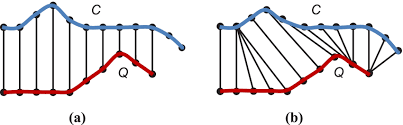

A visual representation of Euclidean distance and DTW distance

But commonly used and particularly effective metric in this context is the Frechet distance.

FRECHET DISTANCE: Frechet distance is a measure of similarity between two curves that takes into account the location and ordering of the points along the paths. It can be intuitively understood as the minimum length of a leash required to walk a dog on a leash, where the person walks along one path and the dog walks along the other path, and both move forward but not necessarily at the same speed.
Advantages:

    Captures Path Similarity: Frechet distance captures the essence of the paths' shapes and how they align with each other, making it very suitable for comparing paths with similar but not identical shapes.
    Sensitive to Path Structure: It is sensitive to the waypoints and turns within the paths, reflecting more about the actual path layout and traversal.

Limitations:

    Complexity: Calculating the Frechet distance can be computationally intensive compared to simpler metrics like Euclidean distance.

# QUESTION 2


While researching on Transformers you learn about embeddings and how words are transformed into Numerical Vectors of High dimensional space, and stored on what basis the ‘likeliness’ of any two vectors are. For eg. words like ‘happiness’, ‘success’ are more alike to each other on the contrary ‘sadness’ , ‘failure’ are alike to each other but opposite to
 ‘happiness’, ‘success’ .


What is the common criterion used to define this ‘likeliness’ mathematically between any two words?
Hint : In Higher Dimensional Spaces euclidean distances fall short !

-----------
-------------


The common criterion used to define the 'likeliness' or similarity between any two words in higher-dimensional spaces is often cosine similarity.

It measures the cosine of the angle between two vectors which represent words on a higher dimenaional space.
There are some other metrics as well but they require a rigorous mathematical approach

--------

REASON BEHIND IRRELEVANCE OF EUCLIDEAN DISTANCE IN HIGH DIMENSIONAL SPACE:
1. Concentration of Distances

In higher dimensions, the distances between any two points tend to become similar. As the dimensionality increases, the distribution of distances between points tends to converge, making it difficult to distinguish between near and far points. This is because the volume of the space increases exponentially with the number of dimensions, and points spread out more uniformly within this vast space.

2. Increased Sparsity

High-dimensional spaces are often sparse, meaning that the data points are spread out thinly within the space. This sparsity can make Euclidean distance less meaningful because the distance between any two points is likely to be large and nearly constant, regardless of their actual relationship or similarity.

# Generate a corpus of words then convert these words into embeddings then using this criterion plot these embeddings in 3D space (for simplicity).

In [ ]:
!pip install numpy tensorflow

In [1]:
corpus = [
    "the cat sat on the mat",
    "the dog chased the cat",
    "the bird flew over the cat",
    "the lion roared at the dog",
    "the tiger stalked the deer",
    "the fish swam in the pond",
    "the bear ate the fish",
    "the shark hunted the whale",
    "the eagle soared above the bird",
    "the car drove down the road",
    "the truck carried heavy load",
    "the bicycle was left on the side",
    "the motorcycle zoomed past",
    "the airplane flew high",
    "the helicopter hovered above",
    "the ship sailed across the sea",
    "the boat floated in the lake",
    "the apple fell from the tree",
    "the banana was ripe and sweet",
    "the orange was juicy",
    "the grape was small",
    "the mango was delicious",
    "the strawberry was red",
    "the blueberry was blue",
    "the watermelon was refreshing"
]


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word2id = tokenizer.word_index
id2word = {v: k for k, v in word2id.items()}
vocab_size = len(word2id) + 1

# Convert sentences to sequences of word ids
sequences = tokenizer.texts_to_sequences(corpus)


In [3]:
window_size = 2
pairs = []

for seq in sequences:
    for i in range(len(seq)):
        target = seq[i]
        context_indices = list(range(max(0, i - window_size), min(len(seq), i + window_size + 1)))
        context_indices.remove(i)
        for j in context_indices:
            pairs.append((target, seq[j]))

# Create numpy arrays for input and output
targets, contexts = zip(*pairs)
targets = np.array(targets)
contexts = np.array(contexts)


In [4]:
embedding_dim = 100

# Define the model
input_target = tf.keras.layers.Input((1,))
input_context = tf.keras.layers.Input((1,))

embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1, name='embedding')

target = embedding(input_target)
target = tf.keras.layers.Reshape((embedding_dim,))(target)

context = embedding(input_context)
context = tf.keras.layers.Reshape((embedding_dim,))(context)

dot_product = tf.keras.layers.Dot(axes=1)([target, context])
output = tf.keras.layers.Dense(1, activation='sigmoid')(dot_product)

model = tf.keras.models.Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
pairs = [targets, contexts]
labels = np.ones(len(targets))

model.fit(pairs, labels, epochs=100, batch_size=64)

# Extract word embeddings
word_embeddings = model.get_layer('embedding').get_weights()[0]


Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.6919
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6882
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6845
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6805
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6761
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6713
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6658
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6594
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6520
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6433
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6331
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6211
Epoch 13/100
6/6 [==============================] - 0s 3ms/st

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensions to 3 using PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(word_embeddings)


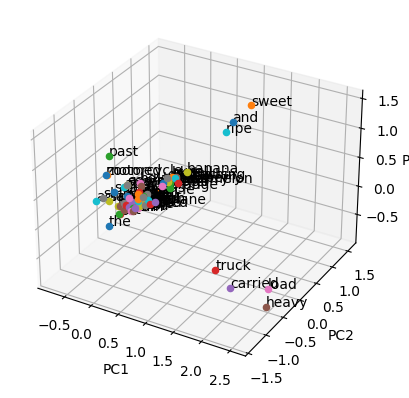

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each word
for i, word in id2word.items():
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2])
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word)

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show plot
plt.show()


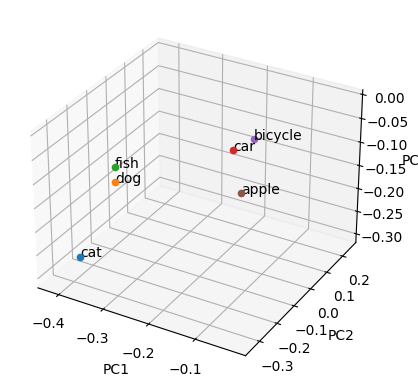

In [7]:
selected_words = ["cat", "dog", "fish", "car", "bicycle", "apple"]
selected_indices = [word2id[word] for word in selected_words if word in word2id]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in selected_indices:
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2])
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], id2word[i])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [8]:
# Calculate and print cosine similarity among selected words
def cosine_similarity(vec1, vec2):
    cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return cos_sim

for i in range(len(selected_indices)):
    for j in range(i + 1, len(selected_indices)):
        word1 = id2word[selected_indices[i]]
        word2 = id2word[selected_indices[j]]
        vec1 = word_embeddings[selected_indices[i]]
        vec2 = word_embeddings[selected_indices[j]]
        similarity = cosine_similarity(vec1, vec2)
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'cat' and 'dog': 0.9535
Cosine similarity between 'cat' and 'fish': 0.9553
Cosine similarity between 'cat' and 'car': 0.9207
Cosine similarity between 'cat' and 'bicycle': 0.9629
Cosine similarity between 'cat' and 'apple': 0.8974
Cosine similarity between 'dog' and 'fish': 0.9613
Cosine similarity between 'dog' and 'car': 0.9377
Cosine similarity between 'dog' and 'bicycle': 0.9609
Cosine similarity between 'dog' and 'apple': 0.9086
Cosine similarity between 'fish' and 'car': 0.9025
Cosine similarity between 'fish' and 'bicycle': 0.9552
Cosine similarity between 'fish' and 'apple': 0.9275
Cosine similarity between 'car' and 'bicycle': 0.9332
Cosine similarity between 'car' and 'apple': 0.8828
Cosine similarity between 'bicycle' and 'apple': 0.8961
